In [ ]:
import numpy as np
import pandas as pd

import scipy

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
from scipy import stats

In [ ]:
data_path = "https://raw.githubusercontent.com/a-milenkin/mipt_data_science_2021/main/data/people_data_clustering.csv"
data = pd.read_csv(data_path, index_col=0)
print("Размеры датасета", data.shape)
data.reset_index(drop = True, inplace = True) # удаляем мультииндекс


Размеры датасета (6000, 9)


<div class="alert alert-info">
<b>Про Датасет</b>
    
Датасет представляет собой информацию по жителям некоторого города.

* `was_married` - Был ли когда-либо женат/замужем
* `children` - Количество детей
* `salary` - Уровень зарплаты
* `sex` - Пол (0 - женщина, 1 - мужчина)
* `age` - Возраст
* `home_cost` - Сумарная стоимость жилья/недвижимости
* `Professon` - Профессия
* `drive_info` - Есть ли водительские права
* `happyness` - уровень счастья по результатам опроса
    
</div>

# Чистка датасета
* Есть ли дубли в данных? Если есть - удалить их (`drop_duplicates`). 
* Найти и удалить выбросы по признаку `home_cost`.

In [ ]:
data.shape[0]-data.drop_duplicates().shape[0] # дубликатов нет

0

In [ ]:
data.dropna(axis = 1, inplace = True) # удаляем driver_info

In [ ]:
q75 = np.percentile(data.home_cost, 75)  # определяем 75 перцентиль
q25 = np.percentile(data.home_cost, 25)  # определяем 25 перцентиль
intr_qr = q75-q25                      # определяем межквартильный диапазон
max = q75+(1.5*intr_qr)                # оцениваем верхнюю границу
min = q25-(1.5*intr_qr)                # оцениваем нижнюю границу

for x in ['home_cost']:                # для каждой строки из home_cost
    data.loc[data[x] < min,x] = np.nan     # присвоение знания nan значениям ниже min
    data.loc[data[x] > max,x] = np.nan     # присвоение знания nan значениям выше max

In [ ]:
data.dropna(inplace = True) # удаляем выбросы

In [ ]:
data.head()

,was_married,children,salary,sex,age,profession,home_cost,happyness
0,1,4.0,4.420530e+07,1,82.0,Engineer,1.003674e+07,0.727499
1,1,2.0,1.737490e+08,1,32.0,Doctor,1.014051e+07,0.383234
2,1,6.0,2.489055e+08,1,14.0,Entertainment,1.043318e+07,0.432142
3,0,1.0,1.268718e+08,0,10.0,Lawyer,1.004299e+07,0.377987
4,1,9.0,8.596042e+07,1,99.0,Artist,1.021908e+07,0.657579


# Проверка гипотез

Перед вами гипотезы из прошлого домашнего задания. Вы уже научились проверять утверждения визуально. Теперь используйте подходящий статистический критерий, чтобы окончательно доказать или опровергнуть гипотезы.

# Правда ли женщины в среднем имеют более высокую зарплату, чем мужчины?



> Создаем функцию для визуализации на одном графике необходимых данных




In [ ]:
def visual(a,b,c,d): # сделаем функцию для визуализации a = 1 параметр, b = 2 параметр
    type_c = data.loc[data[b] == c]  
    type_d = data.loc[data[b] == d] 
    
    bins = 20
    sns.histplot(type_c[a], bins = bins, alpha = 0.9, label = c, edgecolor = 'black')
    sns.histplot(type_d[a], bins = bins, alpha = 0.4, label = d, color = 'orange')
    plt.legend(loc='upper right');


> Построим на распределение зарплат у мужчин и женщин на одном графике



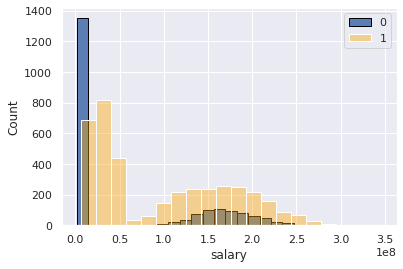

In [ ]:
visual('salary', 'sex', 0, 1)



> Наблюдаем не нормальные распределения. Применяем тест Манна-Уитни



In [ ]:
from scipy.stats.mstats_basic import mannwhitneyu
women = data.loc[data['sex'] == 0].salary
men   = data.loc[data['sex'] == 1].salary
stat, p_value = mannwhitneyu(women, men)
alpha = 0.05
if p_value > alpha:
  print('Одинаковые распределения, не отвeргaем H0')
else:  
  print('Разные распределения, отвeргaем H0')

Разные распределения, отвeргaем H0


Как итог мы доказали, что распределения зарплат у мужчин и женщин статистически различаются. И женщины зарабатывают меньше мужчин.

# Правда ли, что инженеры (Engineer) зарабатывают в среднем больше, чем люди из сферы развлечений (Entertainment)?

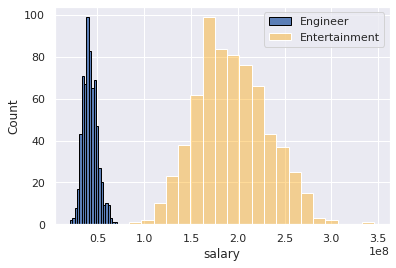

In [ ]:
visual('salary','profession','Engineer','Entertainment')



> Распределения напоминаю нормальные. Проверим на нормальность.



In [ ]:
Engineer      = data.loc[data['profession'] == 'Engineer'].salary
Entertainment = data.loc[data['profession'] == 'Entertainment'].salary
stat, p_value = stats.shapiro(Engineer)
alpha = 0.05
if p_value > alpha:
  print('Распределение нормальное')
else:  
  print('Распределение не нормальное')
stat, p_value = stats.shapiro(Entertainment)
alpha = 0.05
if p_value > alpha:
  print('Распределение нормальное')
else:  
  print('Распределение не нормальное')



> Оба распределения не являются нормальными, применим снова тест Манна-Уитни



In [ ]:
from scipy.stats.mstats_basic import mannwhitneyu
Engineer = data.loc[data['profession'] == 'Engineer'].salary
Entertainment = data.loc[data['profession'] == 'Entertainment'].salary
stat, p_value = mannwhitneyu(Engineer, Entertainment)
alpha = 0.05
if p_value > alpha:
  print('Одинаковые распределения, не отвeргaем H0')
else:  
  print('Разные распределения, отвeргaем H0')

Разные распределения, отвeргaем H0


Как итог мы доказали что различия между зарплатами статистически значимо. Инженеры зарабатывают меньше, чем люди из сферы развлечения.

# Правда ли, что те, у кого больше трёх детей, зарабатывают в среднем больше, чем те, у кого их меньше или трое?

In [ ]:
data['number_children'] = pd.cut(data.children, 
       bins=[-1, 3.0, 9.0], 
       labels=['less_3', 'more_3']) # добавляем столбец количества детей number_children     


> Посмотрим визуально на распределение



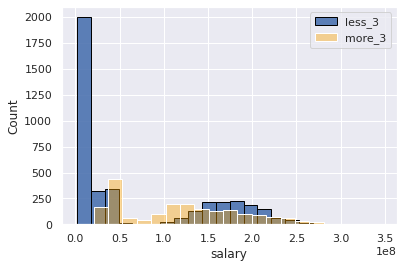

In [ ]:
visual('salary', 'number_children', 'less_3', 'more_3')



> Распределения не являются нормальными, так же применим тест Манна-Уитни



In [ ]:
from scipy.stats.mstats_basic import mannwhitneyu
less_3 = data.loc[data['number_children'] == 'less_3'].salary
more_3 = data.loc[data['number_children'] == 'more_3'].salary
stat, p_value = mannwhitneyu(less_3, more_3)
alpha = 0.05
if p_value > alpha:
  print('Одинаковые распределения, не отвeргaем H0')
else:  
  print('Разные распределения, отвeргaем H0')

Разные распределения, отвeргaем H0


Различия между зарплатами снова статистически значимо. Люди у которых больше 3 детей, в среднем зарабатывают больше, чем те у кого меньше 3 детей.

#Правда ли, что художники (Artist) живут в домах, которые в среднем дороже или дешевле, чем дома адвокатов (Lawyer)?



> Посмотрим визуально



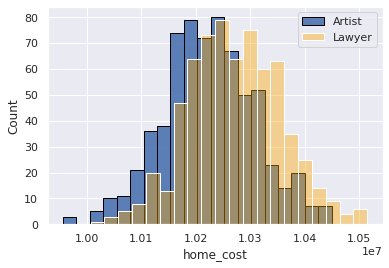

In [ ]:
visual('home_cost', 'profession', 'Artist', 'Lawyer')



> Проверим распредления на нормальность



In [ ]:
Artist = data.loc[data['profession'] == 'Artist'].home_cost
Lawyer = data.loc[data['profession'] == 'Lawyer'].home_cost
stat, p_value = stats.shapiro(Artist)
alpha = 0.05
if p_value > alpha:
  print('Распределение нормальное')
else:  
  print('Распределение не нормальное')
stat, p_value = stats.shapiro(Lawyer)
alpha = 0.05
if p_value > alpha:
  print('Распределение нормальное')
else:  
  print('Распределение не нормальное')

Распределение нормальное
Распределение нормальное




> Оба распределения нормальные. Можно применять t-тест


In [ ]:
Artist = data.loc[data['profession'] == 'Artist'].home_cost
Lawyer = data.loc[data['profession'] == 'Lawyer'].home_cost
stat, p_value = stats.ttest_ind(Artist, Lawyer)
alpha = 0.05
if p_value > alpha:
  print('Одинаковые распределения, не отвeргaем H0')
else:  
  print('Разные распределения, отвeргaем H0')

Разные распределения, отвeргaем H0




> Различие между стоимостью домов у адвокатов и художников статистически значимо. Художники в среднем живут в домах дешевле, чем в дома адвокатов



# Правда ли, что недвижимость тех, кто когда-либо был в браке, в среднем дороже, чем у тех, кто никогда не был в браке?



> Визуализируем графики



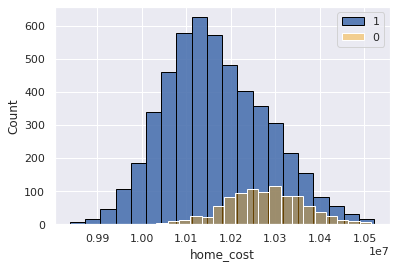

In [ ]:
visual('home_cost', 'was_married', 1, 0 )



> Проверим на нормальность



In [ ]:
not_married = data.loc[data['was_married'] == 0].home_cost
was_married = data.loc[data['was_married'] == 1].home_cost
stat, p_value = stats.shapiro(not_married)
alpha = 0.05
if p_value > alpha:
  print('Распределение нормальное')
else:  
  print('Распределение не нормальное')
stat, p_value = stats.shapiro(was_married)
alpha = 0.05
if p_value > alpha:
  print('Распределение нормальное')
else:  
  print('Распределение не нормальное')

Распределение нормальное
Распределение не нормальное


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
data.loc[data['was_married'] == 1].shape # заметим, что что женатых людей около 5000, воспользуемся в этот раз bootstrap

(5042, 9)

100%|██████████| 1000/1000 [00:02<00:00, 421.55it/s]


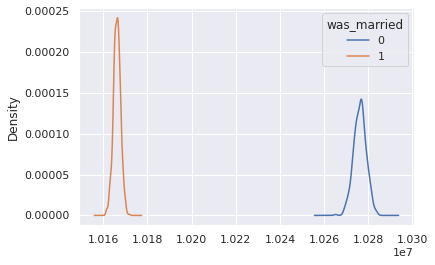

In [ ]:
from tqdm import tqdm
boot = []
for _ in tqdm(range(1000)):
    boot_mean = data.sample(frac = 1, replace = True).groupby('was_married').home_cost.mean()
    boot.append(boot_mean)
boot = pd.DataFrame(boot)
boot.plot(kind = 'density');

In [ ]:
stat, p_value = stats.ttest_ind(boot[1], boot[0]) # t-test
alpha = 0.05
if p_value > alpha:
  print('Одинаковые распределения, не отвeргaем H0')
else:  
  print('Разные распределения, отвeргaем H0')

Разные распределения, отвeргaем H0


Опять таки различие статистически значимо, недвижимость тех, кто когда-либо был в браке, в среднем дешевле, чем у тех, кто никогда не был в браке.

# Правда ли, что мужчины в среднем чаще бывают в браке, чем женщины?


In [ ]:
sex_was_married = data.groupby(['sex', 'was_married'], as_index=False) \
    .agg({'home_cost':'count'}) \
    .pivot(index = 'sex', columns='was_married', values='home_cost') # Построим таблицу сопряженности
sex_was_married

was_married,0,1
sex,,
0,668,1355
1,277,3687


In [ ]:
chi2, p_value, dof, ex = stats.chi2_contingency(sex_was_married) # так как у нас 2 категориальные переменные, применяем критерий Хи-квадрат
alpha = 0.05
if p_value > alpha:
  print('Переменные зависимые')
else:  
  print('Переменные не зависимые')

Переменные не зависимые




> Да, в нашей выборке мужчины в среднем чаще в браке, чем женщины, однако это различие статистически не значимо.



# Правда ли, что женщины с зарплатой выше медианной в среднем более счастливые, чем мужчины с зарплатой, которая выше средней?

In [ ]:
women_happy = data.query('sex==0 and salary > salary.median()').happyness
men_happy = data.query('sex==1 and salary > salary.mean()').happyness

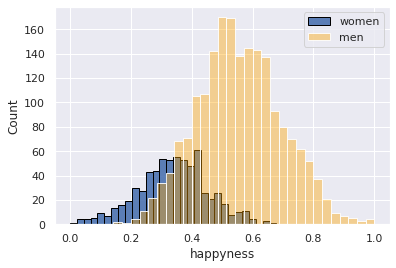

In [ ]:
bins = 30
sns.histplot(women_happy, bins = bins, alpha = 0.9, label = 'women', edgecolor = 'black')
sns.histplot(men_happy, bins = bins, alpha = 0.4, label = 'men', color = 'orange')
plt.legend(loc='upper right');

In [ ]:
stat, p_value = stats.shapiro(women_happy)
alpha = 0.05
if p_value > alpha:
  print('Распределение нормальное')
else:  
  print('Распределение не нормальное')
stat, p_value = stats.shapiro(men_happy)
alpha = 0.05
if p_value > alpha:
  print('Распределение нормальное')
else:  
  print('Распределение не нормальное')

Распределение нормальное
Распределение не нормальное


In [ ]:
stat, p_value = mannwhitneyu(women_happy, men_happy) # применим тест Манна-Уитни
alpha = 0.05
if p_value > alpha:
  print('Одинаковые распределения, не отвeргaем H0')
else:  
  print('Разные распределения, отвeргaем H0')


Разные распределения, отвeргaем H0


Женщины с зарплатой выше медианной в среднем менее счастливые, чем мужчины с зарплатой, которая выше средней. Это различие статистически значимо